#SafePath
This script finds the safest path between two points in the chicago dataset. The path is represented by blocks. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from collections import defaultdict

In [3]:
probability = {}
max_prob = 0
with open('data/probabilities2.csv', 'r') as csvfile:
    masterreader = csv.reader(csvfile)
    for index, row in enumerate(masterreader):
        if index > 0:
            probability[(int(row[0]), int(row[1]))] = float(row[15])
            p = float(row[15])
            max_prob = max(p, max_prob)

In [4]:
list(probability.items())[:10]
max_prob

2.766

In [5]:
# Instead of creating a defaultdict, this function returns the probability of any 
# block and returns 0 if block not found
def get_prob(x,y):
    if (x,y) in probability:
        return probability[(x,y)] * 100
    return 0

In [69]:
def plotgraph(bottomleft, topright, suggestedpath=[]):
    """
    Plots grid of the blocks from bottomleft to topright with the given probabilities
    """

    nrows = topright[1] - bottomleft[1]+1
    ncols = topright[0] - bottomleft[0]+1
    image = np.zeros(nrows*ncols)
    image = image.reshape((nrows, ncols))
    
    for x in range(0, nrows):
        for y in range(0, ncols):
            row = bottomleft[1] + x
            col = bottomleft[0] + y
            # Get the probability for row and col
            #print(col, row)
            if((col,row) in suggestedpath):
                #plt.text(x, y, c, va='center', ha='center')
                image[x][y] = np.nan
            else:
                image[x][y] = get_prob(col, row)
            #print(col, row, get_prob(col,row))
            #print(image[x][y])
    
    row_labels = [bottomleft[1] +nrows - x for x in range(0, nrows)]
    col_labels = [bottomleft[0] + x for x in range(0, ncols)]
    plt.imshow(image, interpolation='nearest', vmin=0, vmax=1)
    
    plt.xticks(range(ncols), col_labels,rotation='vertical')
    plt.yticks(range(nrows), row_labels)
    plt.show()

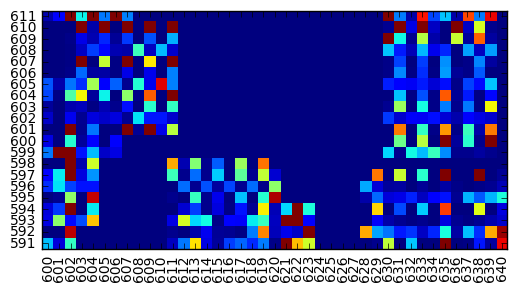

In [70]:
#plotgraph((600,590), (640,610),[(1,1),(1,2)])